# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

** Read in the csv file as a dataframe called df **

In [3]:
data=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [9]:
data['zip'].value_counts()
# top 5 zip code are 19401.0,19464.0,19403.0,19446.0,19406.0

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
           ... 
19119.0       1
77316.0       1
19457.0       1
19082.0       1
19127.0       1
Name: zip, Length: 102, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [10]:
data['twp'].value_counts()
# top 5 townships are LOWER MERION,AMINGSTON,NORRISTOWN,UPPER MERION,CHELTENHAM

LOWER MERION     7202
ABINGTON         5675
NORRISTOWN       5610
POTTSTOWN        4029
CHELTENHAM       3942
                 ... 
BRYN ATHYN        161
SALFORD           156
GREEN LANE         50
PHILA COUNTY       38
LEHIGH COUNTY      21
Name: twp, Length: 67, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [11]:
data['title'].nunique
# 99491 unique title codes r there

<bound method IndexOpsMixin.nunique of 0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
5                   EMS: HEAD INJURY
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 86576, dtype: object>

In [12]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1


In [13]:
data['title'].value_counts()

Traffic: VEHICLE ACCIDENT -      19525
Traffic: DISABLED VEHICLE -       5764
Fire: FIRE ALARM                  5134
EMS: RESPIRATORY EMERGENCY        4810
EMS: CARDIAC EMERGENCY            4686
                                 ...  
Fire: DIABETIC EMERGENCY             1
EMS: BOMB DEVICE FOUND               1
Fire: SYNCOPAL EPISODE               1
EMS: TRAIN CRASH                     1
EMS: DEBRIS/FLUIDS ON HIGHWAY        1
Name: title, Length: 107, dtype: int64

In [14]:
data['title'].dtype

dtype('O')

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [15]:
def your_title(title):
    
    if 'EMS'in title:
        return 'EMS'
    elif 'Fire'in title:
        return 'Fire'
    elif 'Traffic' in title:
        return 'Traffic'
    elif 'Fire' in title:
        return 'Fire'
        
    

In [40]:
your_title('EMS: CARDIAC EMERGENCY')

'EMS'

In [45]:
data['Reasons']=data['title'].apply(your_title)

In [43]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day Of Week,Day of Week,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3,Thu,EMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2,Wed,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2,Wed,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2,Wed,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2,Wed,EMS


In [46]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reasons/Departments', 'Hour', 'Month', 'Day Of Week', 'Day of Week',
       'Reasons'],
      dtype='object')

In [47]:
data['Reasons/Departments'].value_counts()

EMS        44320
Traffic    29254
Fire       13002
Name: Reasons/Departments, dtype: int64

** What is the most common Reason for a 911 call based off of this new column? **

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reasons/Departments', ylabel='count'>

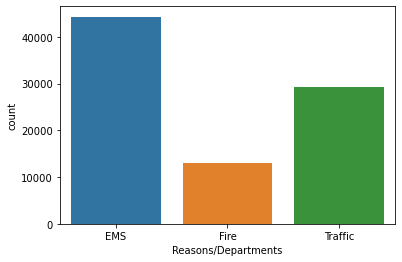

In [48]:
import seaborn as sns
sns.countplot(data=data,x=data['Reasons/Departments'])

In [22]:
# most common reason for 911 call based off Reasons/Departments is EMS

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [23]:
#timestamp is a string here

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lat                  86576 non-null  float64
 1   lng                  86576 non-null  float64
 2   desc                 86576 non-null  object 
 3   zip                  86576 non-null  float64
 4   title                86576 non-null  object 
 5   timeStamp            86576 non-null  object 
 6   twp                  86576 non-null  object 
 7   addr                 86576 non-null  object 
 8   e                    86576 non-null  int64  
 9   Reasons/Departments  86576 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.3+ MB


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [25]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])
#df['Time stamp'] = pd.to_datetime(df['Time stamp'].str.strip(), format='%d/%m/%Y')

In [26]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [27]:
time = data['timeStamp'].iloc[0]
time.hour

17

In [28]:
time.minute

40

In [29]:
time.second

0

In [30]:
time.day_of_week

3

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [49]:
#we can use lambda functions:
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)

In [50]:
data['Month'] = data['timeStamp'].apply(lambda x: x.month)

In [51]:
data['Day Of Week'] = data['timeStamp'].apply(lambda x: x.day_of_week)

In [52]:
data['Day of Week']=data['Day Of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [35]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day Of Week,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

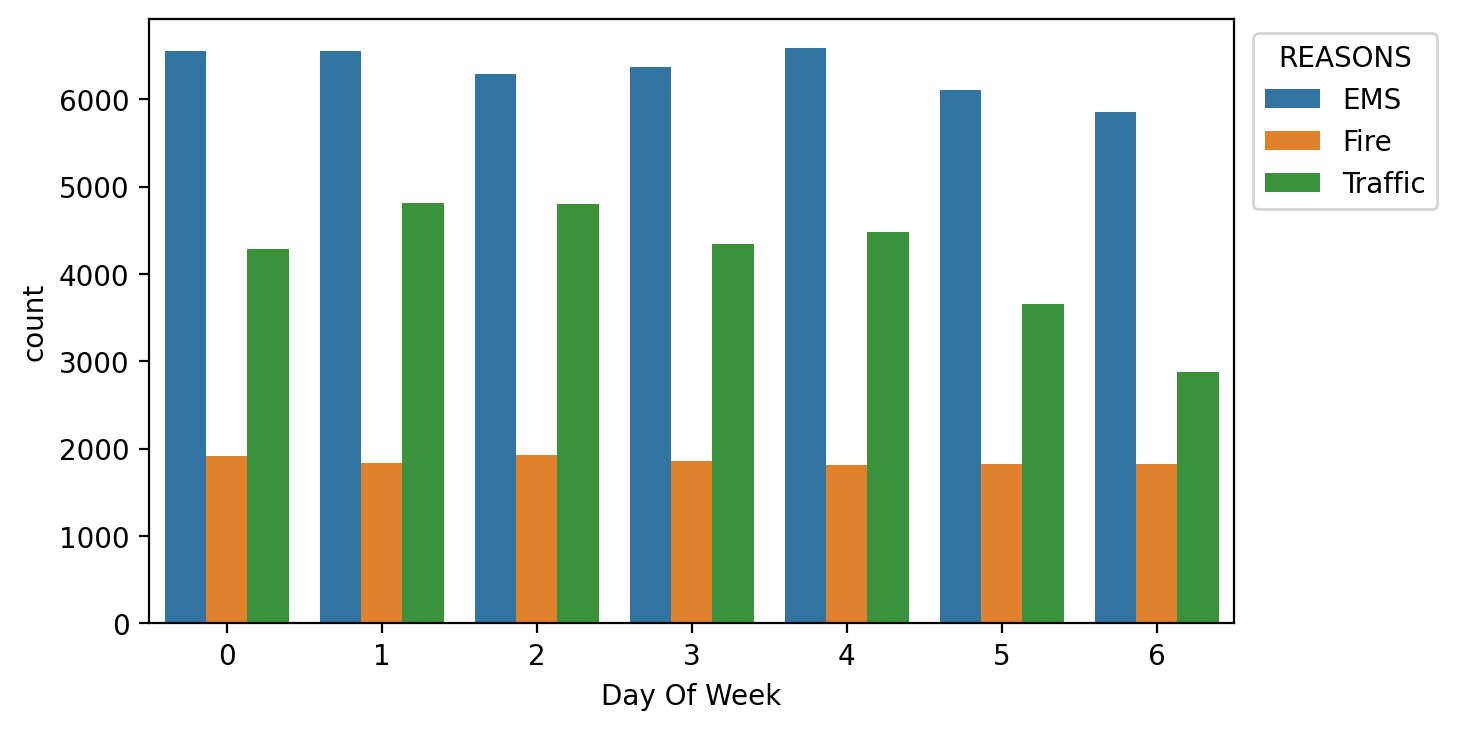

In [53]:
plt.figure(figsize=(7,4),dpi=200)
sns.countplot(data=data,x='Day Of Week',hue='Reasons/Departments')
plt.legend(title="REASONS",bbox_to_anchor=(1.2,1))

**Now do the same for Month:**

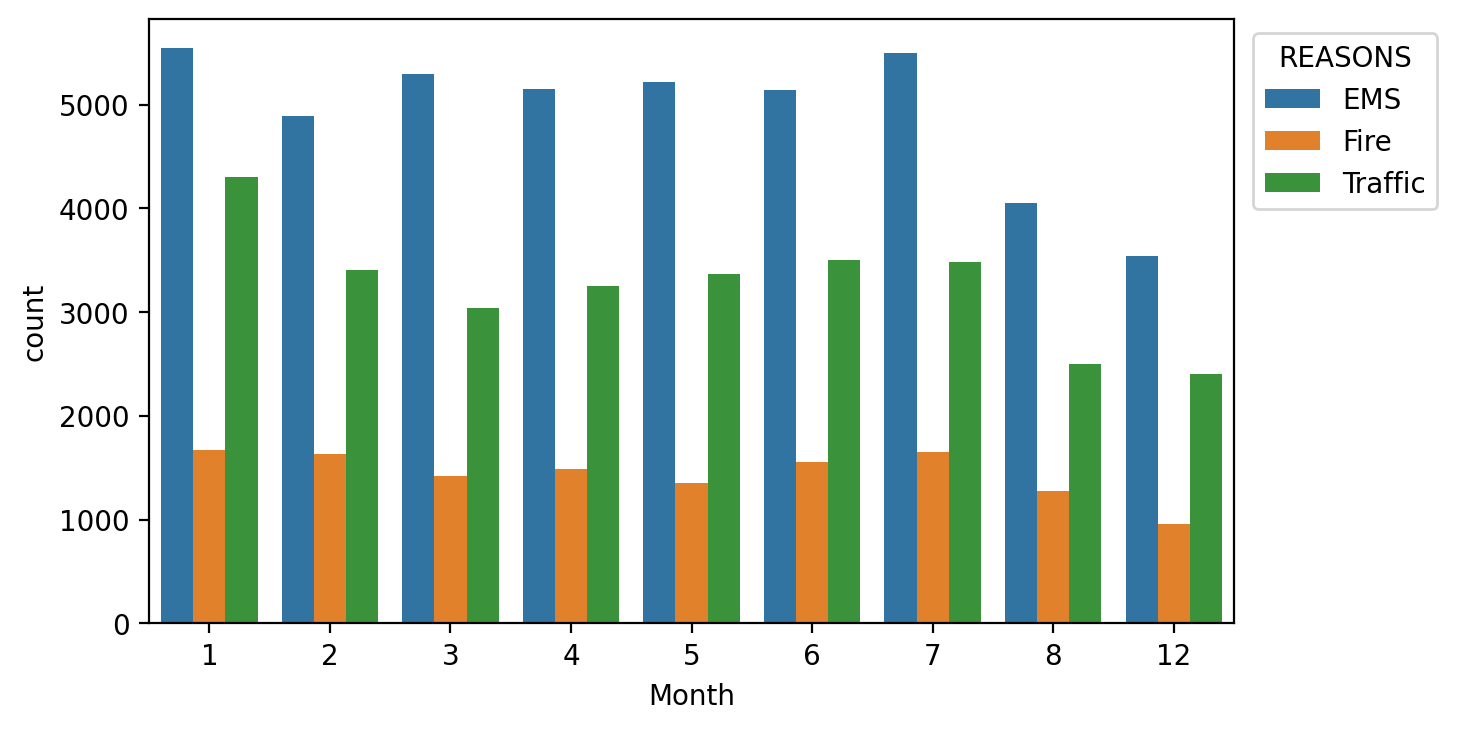

In [100]:
plt.figure(figsize=(7,4),dpi=200)
sns.countplot(data=data,x='Month',hue='Reasons')
plt.legend(title="REASONS",bbox_to_anchor=(1.2,1))

<AxesSubplot:xlabel='Reasons', ylabel='count'>

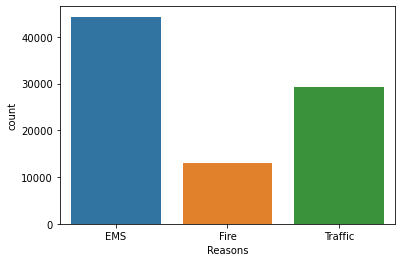

In [99]:
sns.countplot(data=data,x='Reasons')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

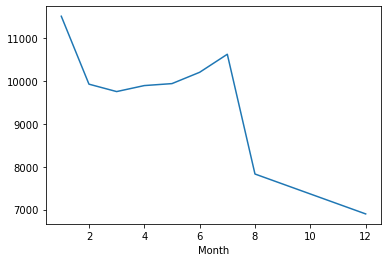

In [68]:
byMonth=data.groupby('Month')['Hour'].count().plot()

In [ ]:
plt.figure(figsize=(10,4),dpi=400)
sns.barplot(data=new ,x='Month',y='twp')


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

<AxesSubplot:xlabel='Month'>

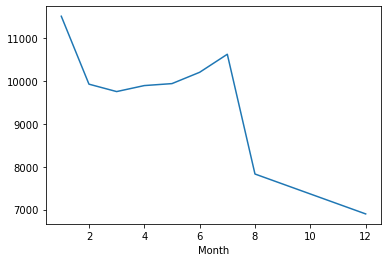

In [81]:
byMonth['lat'].plot()

In [57]:
data['Date']=data['timeStamp'].apply(lambda x:x.date())

In [58]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day Of Week,Day of Week,Reasons,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,EMS,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3,Thu,EMS,2015-12-10


In [64]:
data['title'].iloc[0].split(":")[0]
# we can use this code for splitting the data

'EMS'

In [83]:
byMonth=data.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day Of Week,Day of Week,Reasons,Date
Month,,,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939


In [80]:
data.drop(columns=['Reasons/Departments'],axis=1,inplace=True)

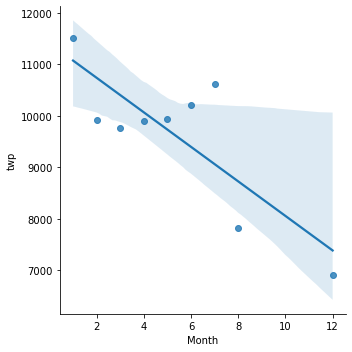

In [82]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

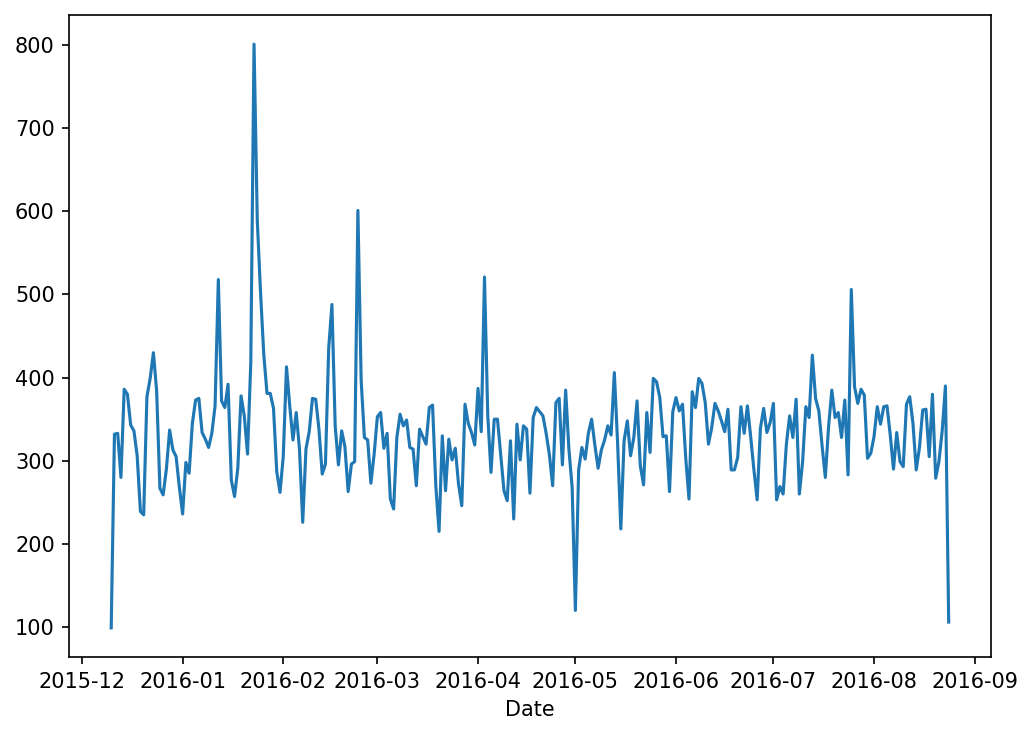

In [94]:
plt.figure(figsize=(7,5),dpi=150)
data.groupby('Date').count()['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

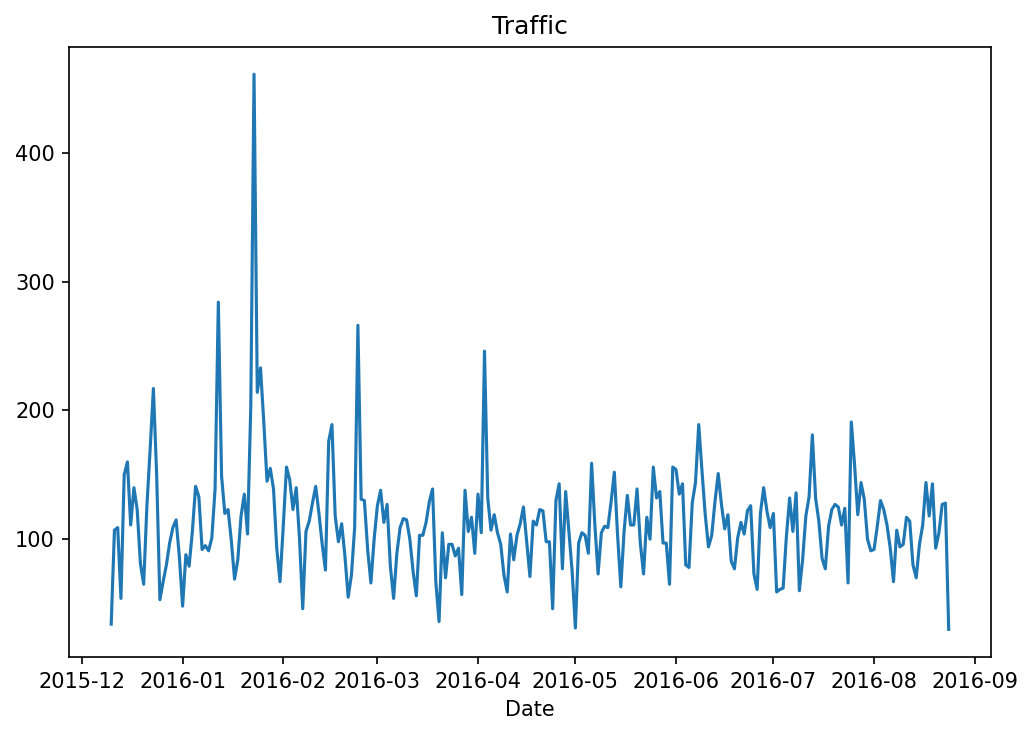

In [95]:
plt.figure(figsize=(7,5),dpi=150)
data[data['Reasons']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

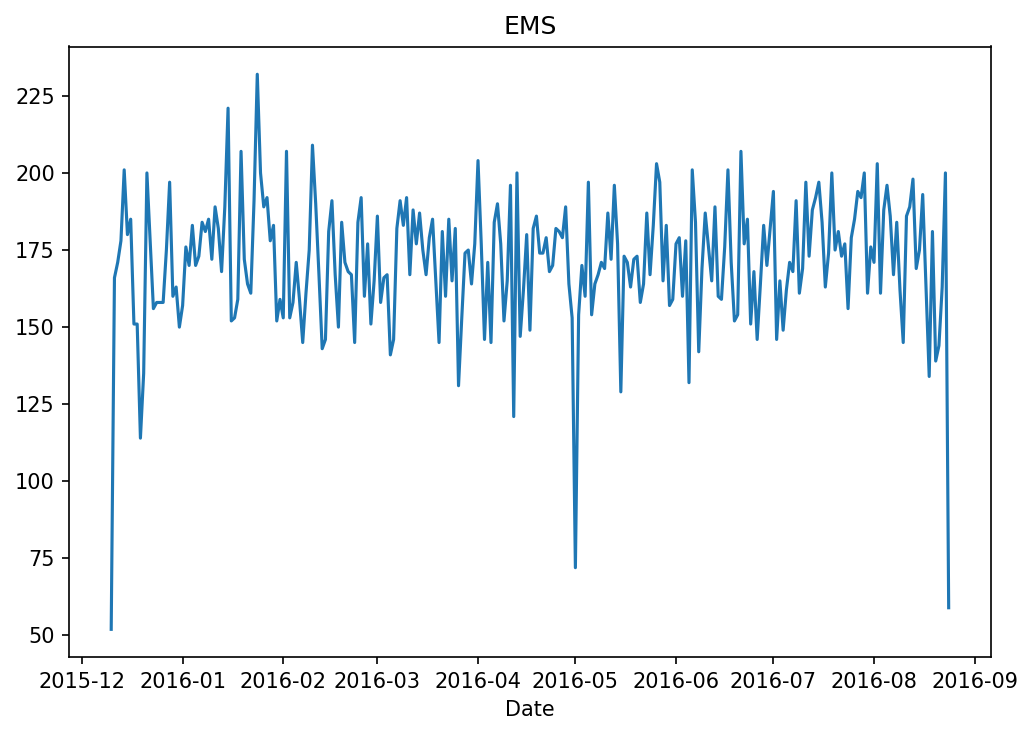

In [97]:
plt.figure(figsize=(7,5),dpi=150)
data[data['Reasons']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

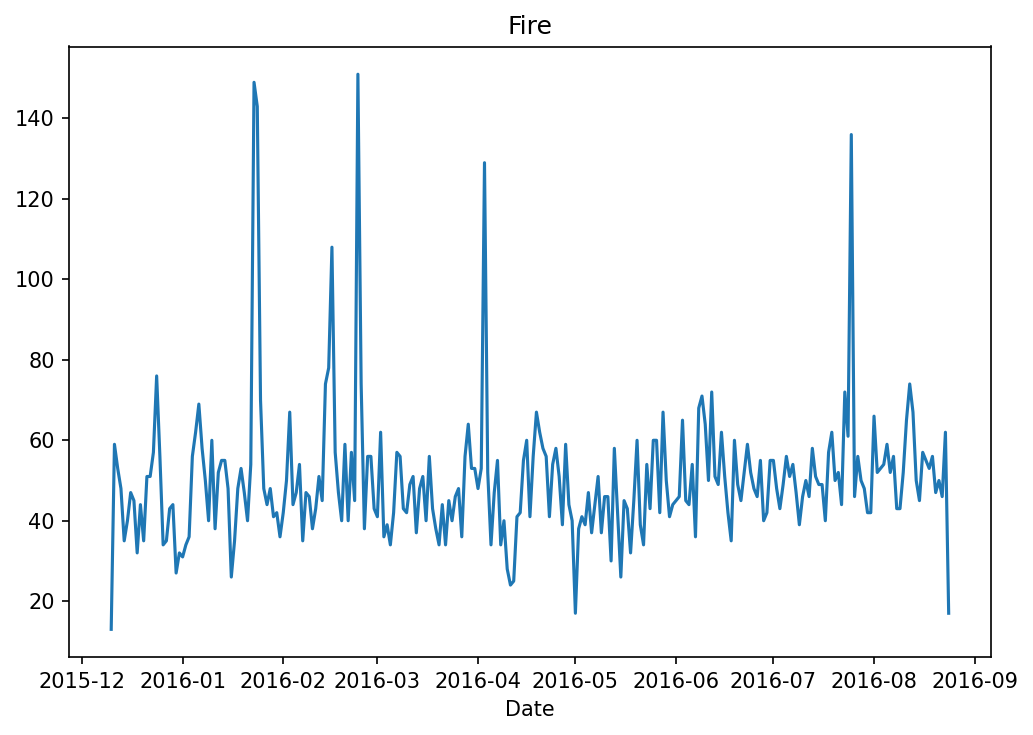

In [101]:
plt.figure(figsize=(7,5),dpi=150)
data[data['Reasons']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [108]:
dayhour=data.groupby(by=['Day Of Week','Hour']).count()['Reasons'].unstack()
#data.columns

** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day Of Week'>

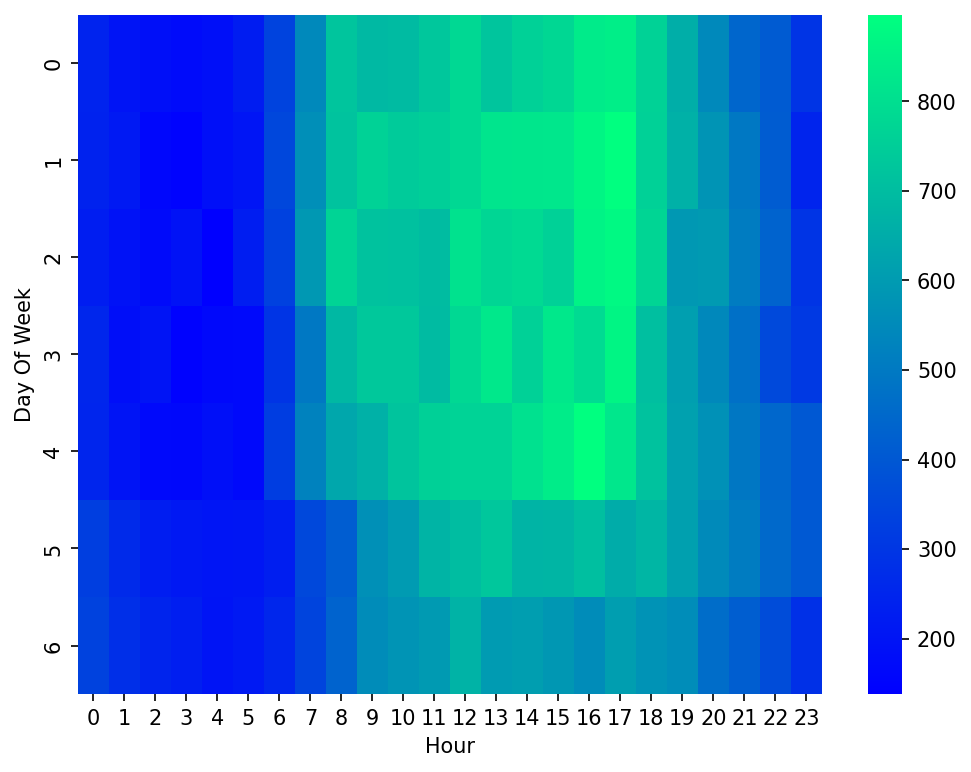

In [111]:
plt.figure(figsize=(8,6),dpi=150)
sns.heatmap(dayhour,cmap='winter')

** Now create a clustermap using this DataFrame. **

<Figure size 1200x900 with 0 Axes>

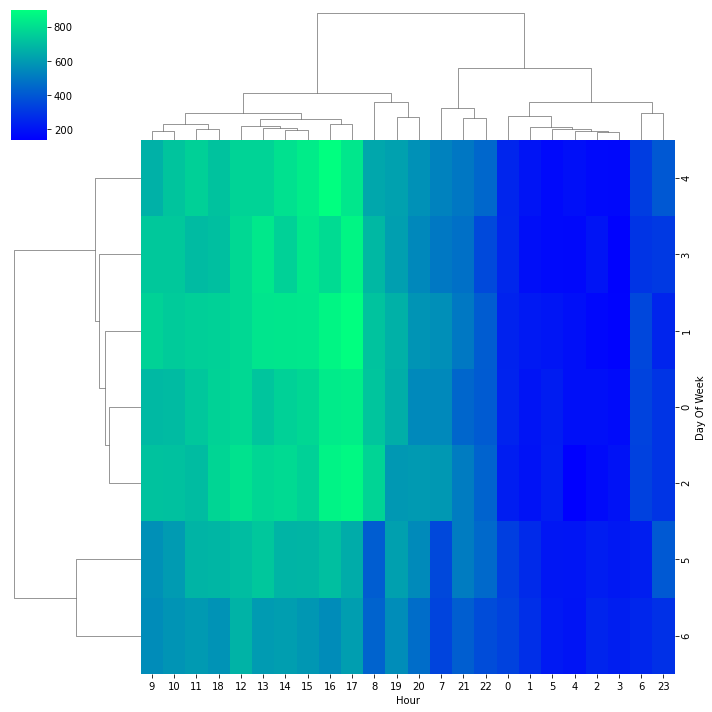

In [112]:
plt.figure(figsize=(8,6),dpi=150)
sns.clustermap(dayhour,cmap='winter')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [115]:
daymonth=data.groupby(by=['Month','Day Of Week']).count()['Reasons'].unstack()
#data.columns

<AxesSubplot:xlabel='Day Of Week', ylabel='Month'>

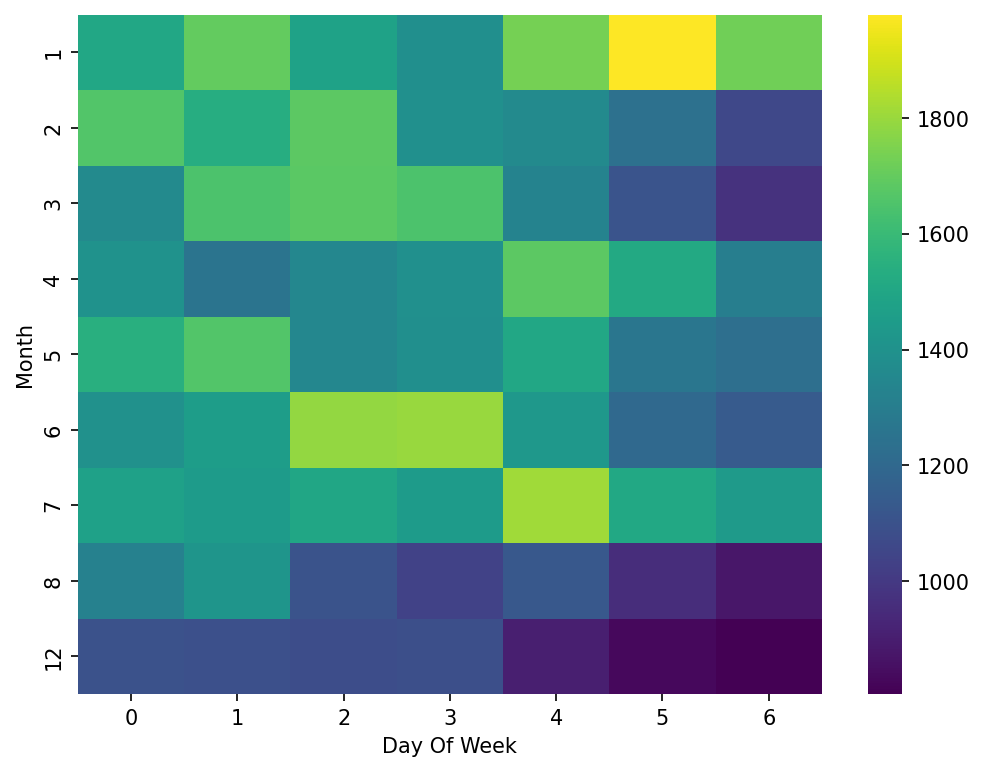

In [118]:
plt.figure(figsize=(8,6),dpi=150)
sns.heatmap(daymonth,cmap='viridis')

<Figure size 1200x900 with 0 Axes>

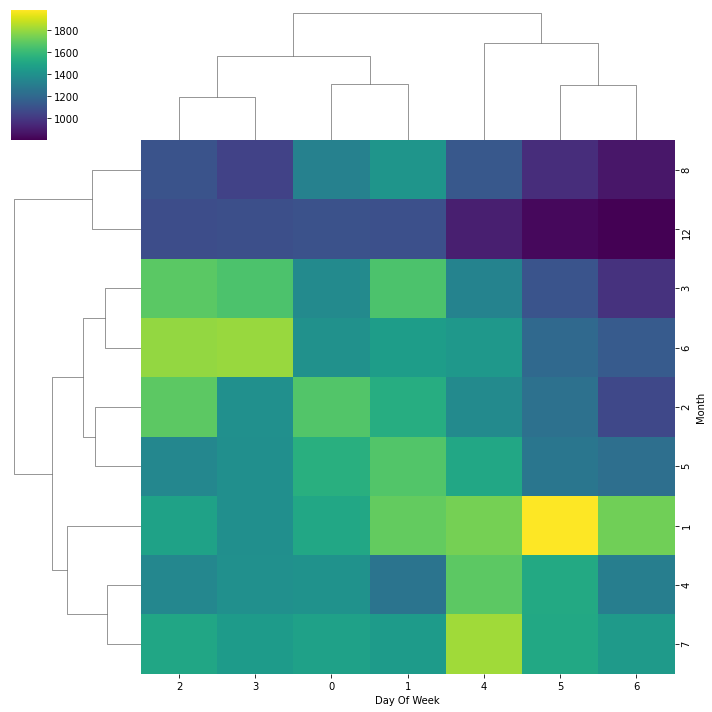

In [119]:
plt.figure(figsize=(8,6),dpi=150)
sns.clustermap(daymonth,cmap='viridis')